---
title: "Helm Net"
date: 2025-08-05
---

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [2]:
!pip install numpy==1.25.2 pandas==2.0.3 seaborn==0.13.1 tensorflow[and-cuda] scikit-learn==1.2.2 matplotlib==3.7.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
images = np.load('/content/drive/MyDrive/images_proj.npy')
labels = pd.read_csv('/content/drive/MyDrive/Labels_proj.csv')

In [5]:
print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


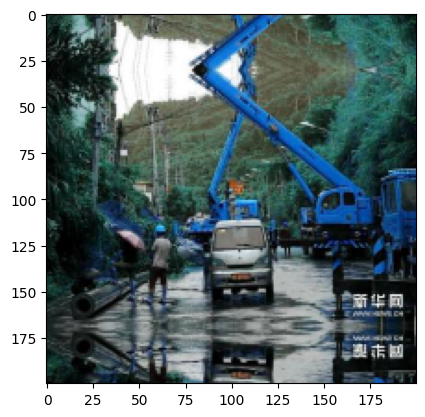

In [6]:
plt.imshow(images[0])

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

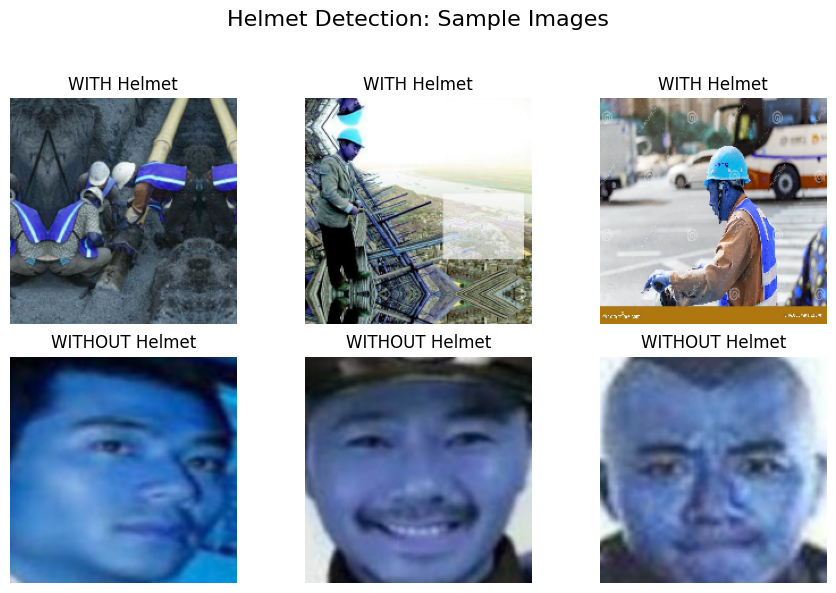

In [7]:
# Load the data
images = np.load('/content/drive/MyDrive/images_proj.npy')
labels = pd.read_csv('/content/drive/MyDrive/Labels_proj.csv')

# Get indices for each class
helmet_indices = np.where(labels['Label'] == 1)[0]
no_helmet_indices = np.where(labels['Label'] == 0)[0]

# Randomly select 3 images from each class
num_samples = 3
selected_helmet_indices = np.random.choice(helmet_indices, size=num_samples, replace=False)
selected_no_helmet_indices = np.random.choice(no_helmet_indices, size=num_samples, replace=False)

# Prepare the plot
fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 3, 6))
fig.suptitle("Helmet Detection: Sample Images", fontsize=16)

# Top row: Workers WITH helmets
for i, idx in enumerate(selected_helmet_indices):
    axes[0, i].imshow(images[idx])
    axes[0, i].set_title("WITH Helmet")
    axes[0, i].axis('off')

# Bottom row: Workers WITHOUT helmets
for i, idx in enumerate(selected_no_helmet_indices):
    axes[1, i].imshow(images[idx])
    axes[1, i].set_title("WITHOUT Helmet")
    axes[1, i].axis('off')

# Final layout tweaks
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Checking for class imbalance


Class Counts:
Label
0    320
1    311
Name: count, dtype: int64

Class Percentages:
Label
0    50.71
1    49.29
Name: proportion, dtype: float64


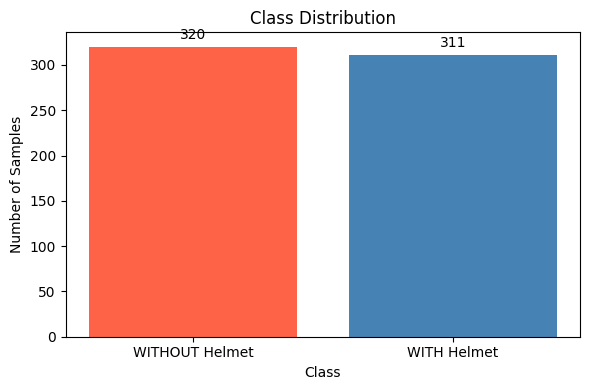

In [8]:
# Step 1: Count the number of samples in each class
class_counts = labels['Label'].value_counts()
print("Class Counts:")
print(class_counts)

# Step 2: Calculate percentages for each class
class_percentages = labels['Label'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages.round(2))

# Step 3: Plot class distribution
plt.figure(figsize=(6, 4))
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=['tomato', 'steelblue'])

# Set class names as x-axis labels
plt.xticks(ticks=[0, 1], labels=["WITHOUT Helmet", "WITH Helmet"], rotation=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")

# Add counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


**There is no significant imbalance.**

# **Data Preprocessing**

## Converting images to grayscale

Showing image at index: 529


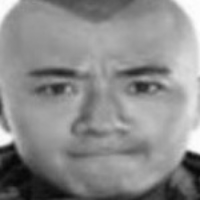

In [64]:
images_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

random_idx = np.random.randint(len(images_gray))  # Pick random index
print(f"Showing image at index: {random_idx}")
cv2_imshow(images_gray[random_idx])

### Splitting the dataset



In [65]:
# Step 1: Add channel dimension → shape: (N, H, W, 1)
images_gray = images_gray[..., np.newaxis]

# I had trouble working with single channel greyscale data so had to convert the grayscale to three channels.

# Step 2: Repeat channel to convert to RGB shape → (N, H, W, 3)
images_rgb = np.repeat(images_gray, 3, axis=-1)

# Step 3: Then split into train/val/test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(images_rgb, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,stratify=y_temp)


### Data Normalization

In [66]:
X_train_norm = X_train.astype('float32') / 255.0
X_val_norm = X_val.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [68]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [71]:
# Initializing Model
model_1 = Sequential()

# Convolutional layers
model_1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding="same",input_shape=(200,200,3)))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding="same"))
model_1.add(MaxPooling2D((4, 4), padding='same'))
model_1.add(Conv2D(128, kernel_size=(3, 3),activation='relu',padding="same"))

# Flatten and Dense layers
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

#compile with Adam optimizer
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

#Summary
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,553 (21.48 MB)

 Trainable params: 5,631,553 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history_1 = model_1.fit(X_train_norm, y_train, batch_size=32, epochs=10, validation_data=(X_val_norm, y_val))

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.6375 - loss: 0.6465 - val_accuracy: 0.9684 - val_loss: 0.4083
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9478 - loss: 0.3564 - val_accuracy: 0.9895 - val_loss: 0.1655
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9780 - loss: 0.1446 - val_accuracy: 0.9895 - val_loss: 0.0987
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9864 - loss: 0.0636 - val_accuracy: 0.9789 - val_loss: 0.0671
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9926 - loss: 0.0332 - val_accuracy: 0.9789 - val_loss: 0.0667
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.9789 - val_loss: 0.0696
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.9684 - val_loss: 0.0786
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9931 - loss: 0.0157 - val_accuracy: 0.9684 - 

### Vizualizing the predictions

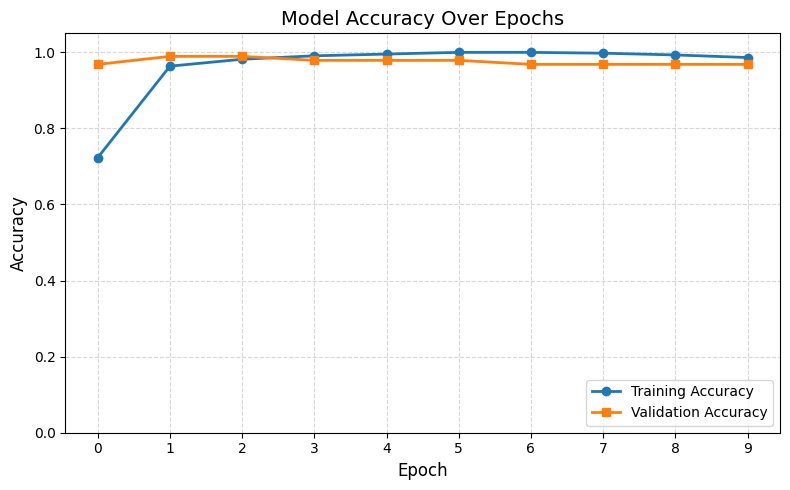

In [73]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_1.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')

# Add titles and labels
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add grid, legend, and formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(range(len(history_1.history['accuracy'])))
plt.ylim(0, 1.05)

# Display the plot
plt.tight_layout()
plt.show()

In [74]:
model_1_train_perf = model_performance_classification(model_1, X_test_norm, y_test)
print("Train performance metrics")
print(model_1_train_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.978947  0.978947   0.979789  0.978933


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


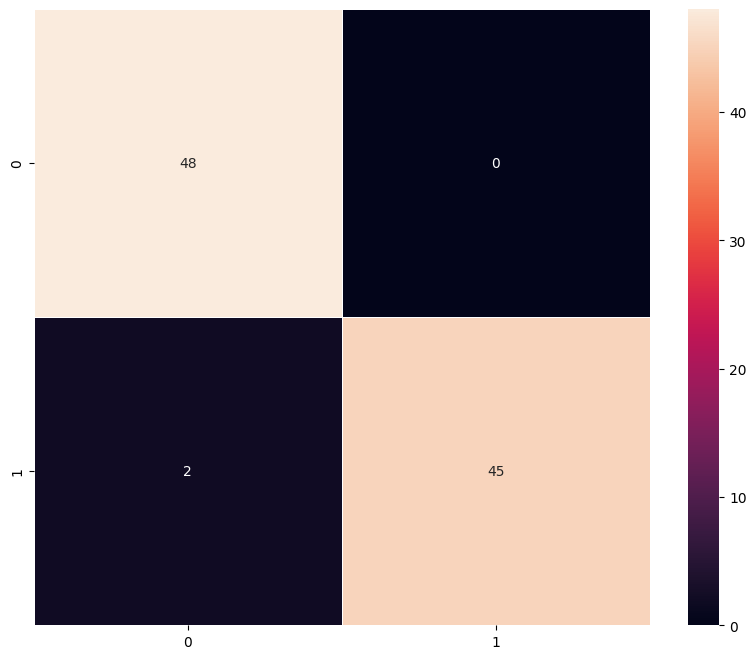

In [75]:
plot_confusion_matrix(model_1,X_test_norm,y_test)

In [76]:
model_1_val_perf = model_performance_classification(model_1, X_val_norm, y_val)
print("Validation performance metrics")
print(model_1_val_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.968421  0.968421   0.968622  0.968414


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


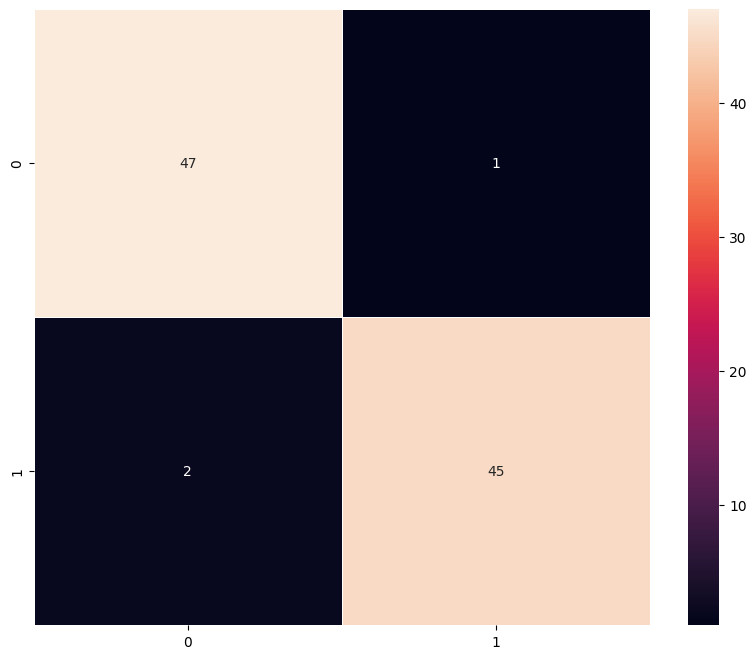

In [77]:
plot_confusion_matrix(model_1,X_val_norm,y_val)

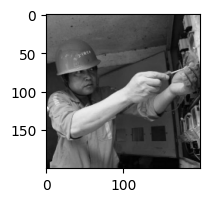

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: 1
True Label: Label    1
Name: 173, dtype: int64


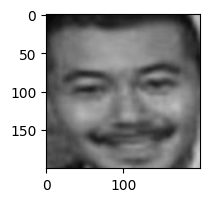

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: 0
True Label: Label    0
Name: 462, dtype: int64


In [80]:
# For index 12
plt.figure(figsize=(2,2))
plt.imshow(X_val[12])
plt.show()
prediction = model_1.predict(X_val_norm[12].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[12]
print('True Label:', true_label)

# For index 33
plt.figure(figsize=(2,2))
plt.imshow(X_val[33])
plt.show()
prediction = model_1.predict(X_val_norm[33].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[33]
print('True Label:', true_label)


## Model 2: (VGG-16 (Base))

- We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will add a Flatten and a single dense layer.


In [81]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [83]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

# Adding a dense output layer
model_2.add(Dense(1, activation='sigmoid'))

opt=Adam()

#Compile the model
model_2.compile(optimizer=opt,loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

# Summary of the model
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [84]:
train_datagen = ImageDataGenerator()

# Epochs
epochs = 10

# Batch Size
batch_size = 32

history_2 = model_2.fit(train_datagen.flow(X_train_norm, y_train, batch_size=batch_size, seed=42,
                        shuffle=False),epochs=epochs,
                        steps_per_epoch=X_train_norm.shape[0],
                        validation_data=(X_val_norm, y_val),verbose=1)

Epoch 1/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9158 - loss: 0.1759 - val_accuracy: 1.0000 - val_loss: 0.0180
Epoch 2/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 3/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 4/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0072
Epoch 5/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 6/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 7/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 8/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 1.0000 - loss: 0.0010 - v

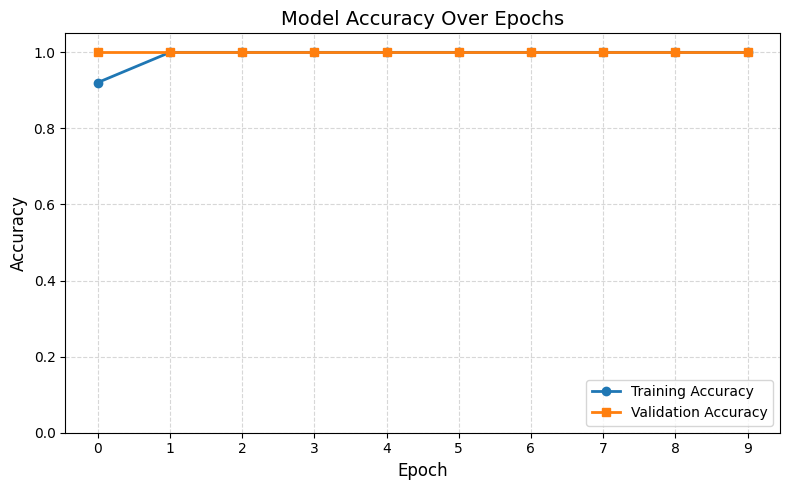

In [85]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_2.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')

# Add titles and labels
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add grid, legend, and formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(range(len(history_1.history['accuracy'])))
plt.ylim(0, 1.05)

# Display the plot
plt.tight_layout()
plt.show()

In [86]:
model_2_train_perf = model_performance_classification(model_2, X_test_norm, y_test)
print("Train performance metrics")
print(model_2_train_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


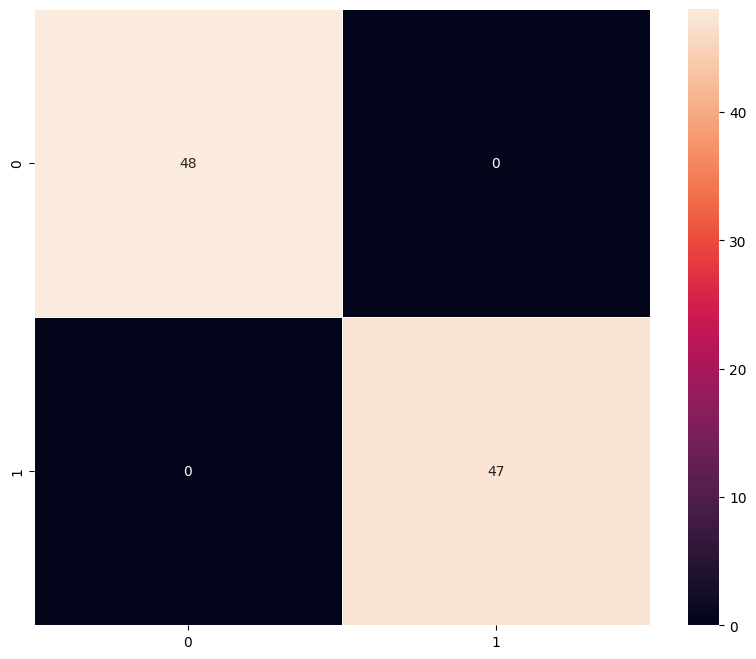

In [87]:
plot_confusion_matrix(model_2,X_test_norm,y_test)

In [88]:
model_2_val_perf = model_performance_classification(model_2, X_val_norm, y_val)
print("Validation performance metrics")
print(model_2_val_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


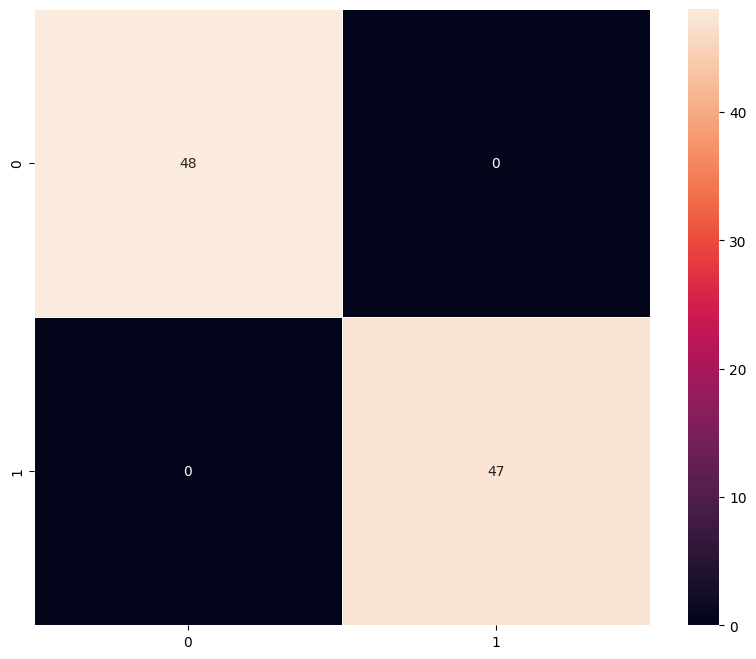

In [89]:
plot_confusion_matrix(model_2,X_val_norm,y_val)

### Visualizing the prediction:

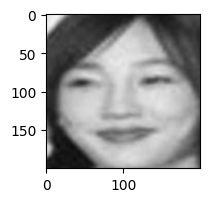

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
Predicted Label: 0
True Label: Label    0
Name: 311, dtype: int64


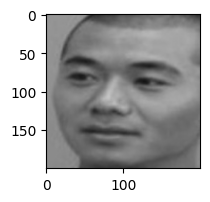

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Label: 0
True Label: Label    0
Name: 508, dtype: int64


In [90]:
# For index 80
plt.figure(figsize=(2,2))
plt.imshow(X_val[80])
plt.show()
prediction = model_2.predict(X_val_norm[80].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[80]
print('True Label:', true_label)

# For index 28
plt.figure(figsize=(2,2))
plt.imshow(X_val[28])
plt.show()
prediction = model_2.predict(X_val_norm[28].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[28]
print('True Label:', true_label)

## Model 3: (VGG-16 (Base + FFNN))

In [91]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation='relu'))

# Adding a dense output layer
model_3.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.0001)

# Compile the model
model_3.compile(optimizer=opt,loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466,561 (74.26 MB)

 Trainable params: 4,751,873 (18.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [92]:
history_3 = model_3.fit(train_datagen.flow(X_train_norm, y_train, batch_size=batch_size, seed=42,
                        shuffle=False),epochs=epochs,
                        steps_per_epoch=X_train_norm.shape[0],
                        validation_data=(X_val_norm, y_val),verbose=1)

Epoch 1/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8381 - loss: 0.3404 - val_accuracy: 0.9789 - val_loss: 0.0556
Epoch 2/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.9977 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.0133
Epoch 3/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.9895 - val_loss: 0.0173
Epoch 4/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9895 - val_loss: 0.0193
Epoch 5/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9895 - val_loss: 0.0133
Epoch 6/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9895 - val_loss: 0.0124
Epoch 7/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 8/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 1.0000 - loss: 0.0020 - v

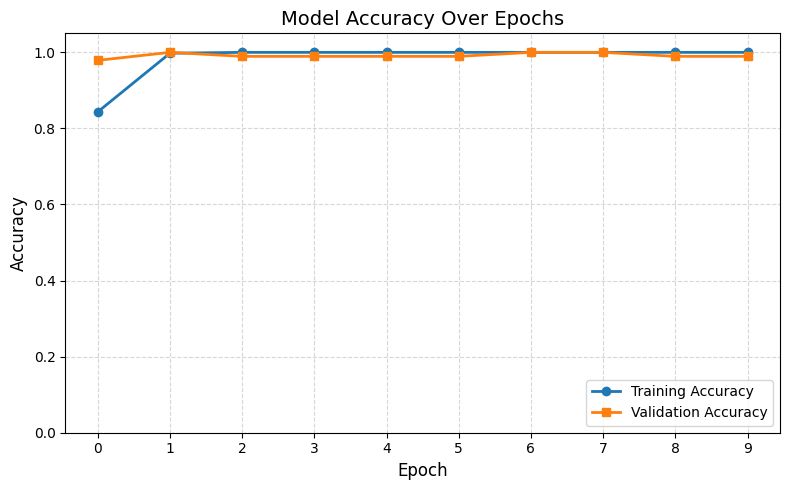

In [93]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_3.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')

# Add titles and labels
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add grid, legend, and formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(range(len(history_1.history['accuracy'])))
plt.ylim(0, 1.05)

# Display the plot
plt.tight_layout()
plt.show()

In [94]:
model_3_train_perf = model_performance_classification(model_3, X_test_norm, y_test)
print("Train performance metrics")
print(model_3_train_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


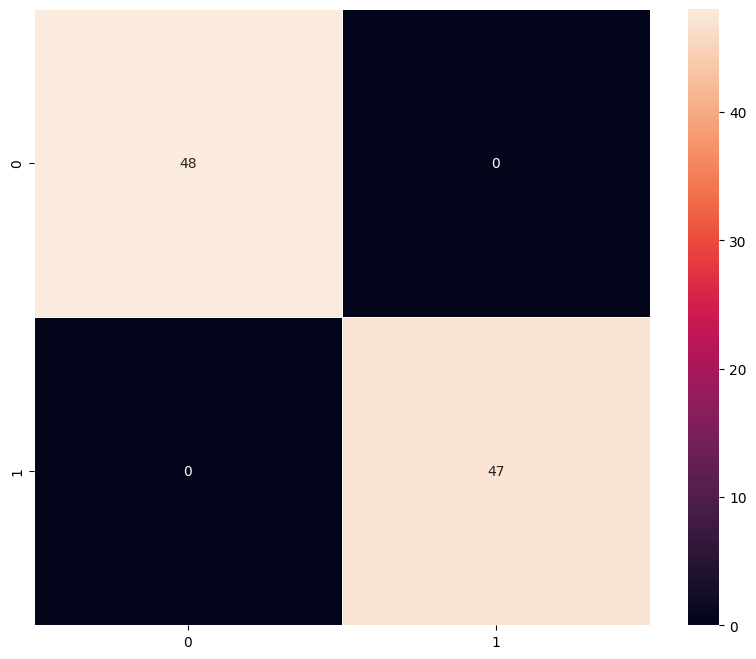

In [95]:
plot_confusion_matrix(model_3,X_test_norm,y_test)

In [96]:
model_3_val_perf = model_performance_classification(model_3, X_val_norm, y_val)
print("Validation performance metrics")
print(model_3_val_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.989474  0.989474   0.989693  0.989474


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


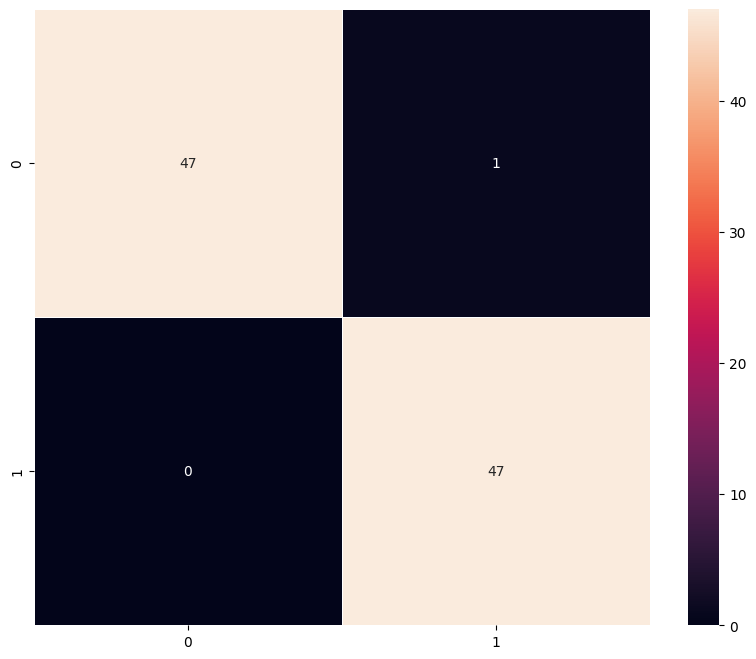

In [97]:
plot_confusion_matrix(model_3,X_val_norm,y_val)

#### Visualizing the predictions

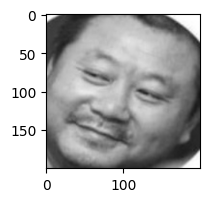

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Predicted Label: 0
True Label: Label    0
Name: 514, dtype: int64


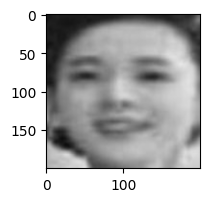

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Label: 0
True Label: Label    0
Name: 431, dtype: int64


In [98]:
# For index 5
plt.figure(figsize=(2,2))
plt.imshow(X_val[5])
plt.show()
prediction = model_3.predict(X_val_norm[5].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[5]
print('True Label:', true_label)

# For index 8
plt.figure(figsize=(2,2))
plt.imshow(X_val[8])
plt.show()
prediction = model_3.predict(X_val_norm[8].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[8]
print('True Label:', true_label)

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [99]:
model_4 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_4.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_4.add(Flatten())

#Adding the Feed Forward neural network
model_4.add(Dense(256, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(128, activation='relu'))

# Adding a dense output layer
model_4.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.0001)

# Compile the model
model_4.compile(optimizer=opt,loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

# Generating the summary of the model
model_4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,466,561 (74.26 MB)

 Trainable params: 4,751,873 (18.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [100]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2
)

In [101]:
history_4 = model_4.fit(train_datagen.flow(X_train_norm, y_train, batch_size=batch_size, seed=42,
                        shuffle=False),epochs=epochs,
                        steps_per_epoch=X_train_norm.shape[0],
                        validation_data=(X_val_norm, y_val),verbose=1)

Epoch 1/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8090 - loss: 0.4034 - val_accuracy: 0.9789 - val_loss: 0.0856
Epoch 2/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9857 - loss: 0.0823 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 3/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9934 - loss: 0.0301 - val_accuracy: 1.0000 - val_loss: 0.0096
Epoch 4/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 5/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9976 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 6/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 7/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 8/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1

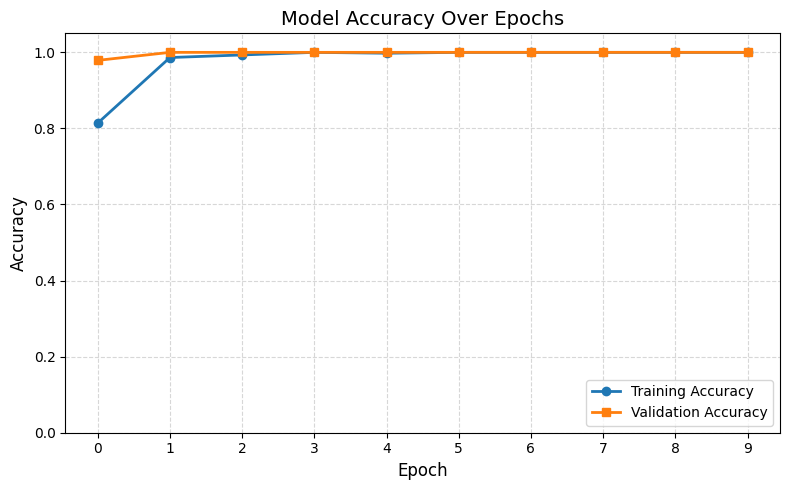

In [102]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history_4.history['accuracy'], label='Training Accuracy', linewidth=2, marker='o')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy', linewidth=2, marker='s')

# Add titles and labels
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add grid, legend, and formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right', fontsize=10)
plt.xticks(range(len(history_1.history['accuracy'])))
plt.ylim(0, 1.05)

# Display the plot
plt.tight_layout()
plt.show()

In [103]:
model_4_train_perf = model_performance_classification(model_4, X_test_norm, y_test)
print("Train performance metrics")
print(model_4_train_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


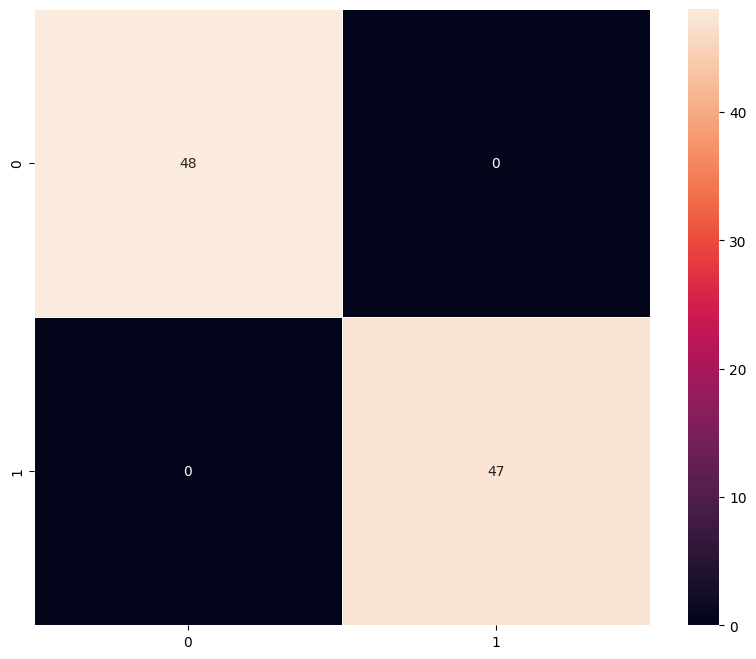

In [104]:
plot_confusion_matrix(model_4,X_test_norm,y_test)

In [105]:
model_4_val_perf = model_performance_classification(model_4, X_val_norm, y_val)
print("Validation performance metrics")
print(model_4_val_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


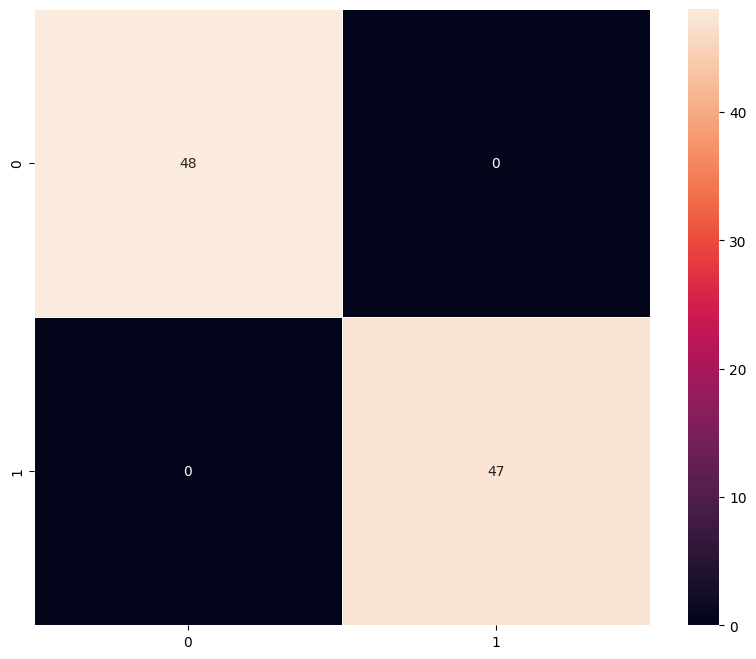

In [106]:
plot_confusion_matrix(model_4,X_val_norm,y_val)

#### Visualizing the predictions

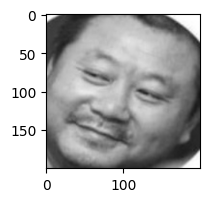

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Predicted Label: 0
True Label: Label    0
Name: 514, dtype: int64


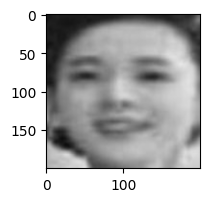

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Label: 0
True Label: Label    0
Name: 431, dtype: int64


In [107]:
# For index 5
plt.figure(figsize=(2,2))
plt.imshow(X_val[5])
plt.show()
prediction = model_4.predict(X_val_norm[5].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[5]
print('True Label:', true_label)

# For index 8
plt.figure(figsize=(2,2))
plt.imshow(X_val[8])
plt.show()
prediction = model_4.predict(X_val_norm[8].reshape(1,200,200,3))
predicted_label = prediction[0][0]>0.5  # Extract the predicted class label
print('Predicted Label:', 1 if predicted_label else 0)
# Fix indexing issue in y_val
true_label = y_val.iloc[8]
print('True Label:', true_label)

# **Model Performance Comparison and Final Model Selection**

In [108]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [109]:
models_valid_comp_df = pd.concat(
    [
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "Simple Convolutional Neural Network (CNN)","VGG-16 (Base)","VGG-16 (Base+FFNN)","VGG-16 (Base+FFNN+Data Aug)"
]

In [110]:
models_train_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.978947,1.0,1.0,1.0
Recall,0.978947,1.0,1.0,1.0
Precision,0.979789,1.0,1.0,1.0
F1 Score,0.978933,1.0,1.0,1.0


In [111]:
models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.968421,1.0,0.989474,1.0
Recall,0.968421,1.0,0.989474,1.0
Precision,0.968622,1.0,0.989693,1.0
F1 Score,0.968414,1.0,0.989474,1.0


In [112]:
models_train_comp_df - models_valid_comp_df

,Simple Convolutional Neural Network (CNN),VGG-16 (Base),VGG-16 (Base+FFNN),VGG-16 (Base+FFNN+Data Aug)
Accuracy,0.010526,0.0,0.010526,0.0
Recall,0.010526,0.0,0.010526,0.0
Precision,0.011168,0.0,0.010307,0.0
F1 Score,0.010519,0.0,0.010526,0.0


## Test Performance

**All the models perform very well, so choose the model based on the use case (see below in Recommendations). I tested with VGG-16 (Base)**

In [113]:
model_test_perf = model_performance_classification(model_2, X_test_norm, y_test)
print("Test performance metrics")
print(model_test_perf)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


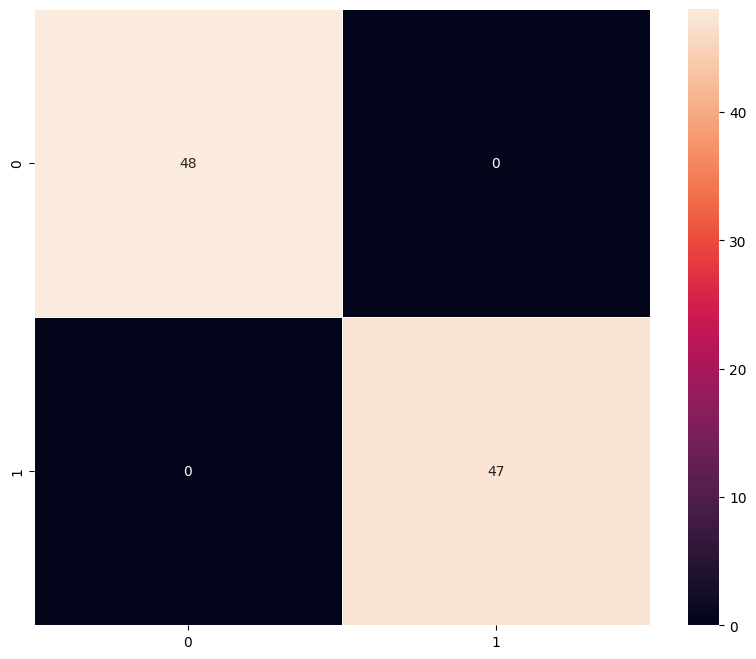

In [114]:
plot_confusion_matrix(model_2,X_test_norm,y_test)

# **Actionable Insights & Recommendations**

**Insights: All models perform extremely well, including the simple CNN.**

* Suggests that the dataset is clean and the classes are well-separated.
* No significant signs of overfitting.

**VGG-16 models achieve 100% accuracy on both train and validation.**

* Indicates that VGG-16 has high capacity, and the dataset may not be challenging enough to expose its limits.

**Data augmentation did not degrade performance.**

* This is a strong indicator that the model is robust to variations (e.g., rotation, flips).

**The training–validation gap is negligible (≤1%).**

* Confirms the models generalize well without leakage or memorization.

**Visual inspection shows “no helmet” images are obvious.**

* The task may be solvable even with lightweight models or classical methods.

**Recommendations:**
* Choose the model based on deployment needs:
* For Lightweight/edge device	use Simple CNN
* For High accuracy/critical safety	use VGG-16 + FFNN + Data Augmentation

<font size=5 color='blue'>Power Ahead!</font>
___